# Rules

- Internet and Books are ALLOWED
- Name your file as following: StudentID_ChineseName/EnglishName_quiz# 
- Extension of your file or your file type should be .py .
- If MOSS (Measure of Software Similarity) detects that any two files have more than 50% similarity, both students will get 0 for this quiz (We give it a base code that everyone has, so no need to worry about that)
- If you submit the code within an hour you will get the full score. Otherwise, you will have 24 hours to finish it and you will get 80% of your final score.

# Accept/Reject Algorithm


## 1.Generate a random variable Y ~ beta(3.2, 5.6) by Accept/Reject algorithm


Step1. Generate $(U,V)$ independent uniform(0,1)

Step2. If $$U < \frac{1}{c}f_{Y}(V)$$ set $Y = V$; otherwise return to step1. Where $c$ = max$_{y}f_{Y}(y)$ 

Example plot

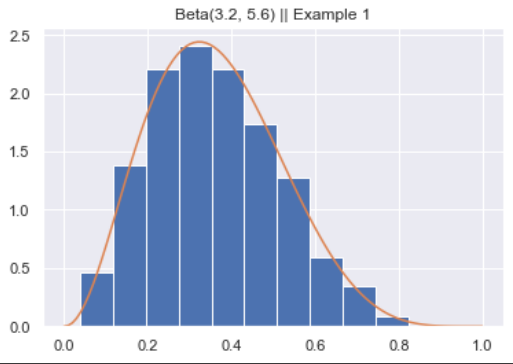

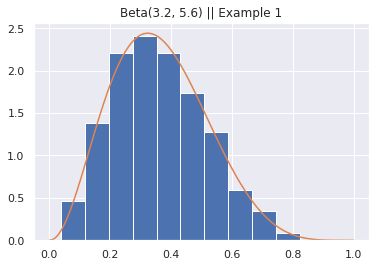

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma
import seaborn as sns
sns.set()
np.random.seed(523)

def f1(x):
  a = 3.2
  b = 5.6
  beta = gamma(a) * gamma(b) /gamma(a + b)
  p = x ** (a - 1) * (1-x) ** (b - 1)
  return 1/beta * p

mode = (3.2-1)/(3.2+5.6-2) ##Mode of Beta distribution
c = f1(mode)

def beta_gen(n):
  i = 0
  output = np.zeros(n)
  while i < n:
    U = np.random.uniform(size = 1)
    V = np.random.uniform(size = 1)
    if U < 1/c * f1(V):
      output[i] = V
      i = i + 1
  return output

px = np.arange(0,1+0.01,0.01)
py = f1(px)

Y = beta_gen(n = 1000)
fig,ax = plt.subplots()
temp = ax.hist(Y,density=True)
ax.plot(px,py)
plt.title("Beta(3.2, 5.6) || Example 1")
plt.show()

## 2.Generate a random variable Y ~ beta(3.2, 5.6) by Accept/Reject algorithm


Step1. Generate $U$ ~ uniform(0,1), $V$ ~ beta(2,6)

Step2. If $$U < \frac{1}{M} \frac{f_{Y}(V)}{f_{V}(V)}$$ set $Y = V$; otherwise return to step1.Where $M$ = sup$_{y}$$\frac{f_{Y}(y)}{f_{V}(y)}$ 

$$Y = \frac{Σ_{j=1}^{a} log(U_{j})}{Σ_{j=1}^{a+b} log(U_{j})} \sim beta(a, b)$$  

print $M$ after you calculate it

-Hint you need to find M by yourself

Example plot

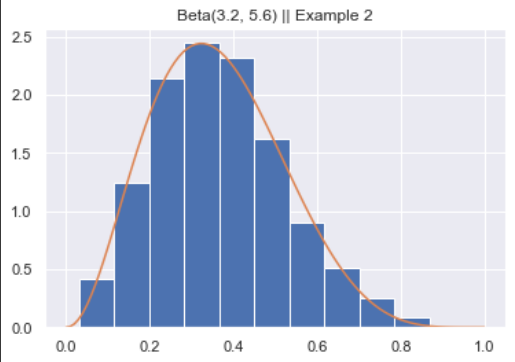

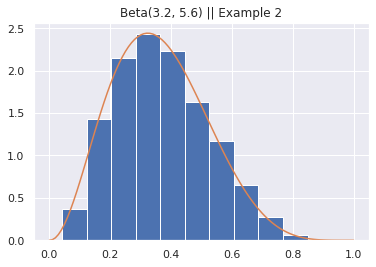

In [254]:
##Beta(2,6) Generation
def beta_gen2(n): 
  i = 0
  output = np.zeros(n)
  while i < n:
    U = np.random.uniform(size = 2 + 6)
    p1 = np.sum(np.log(U[0:2]))
    p2 = np.sum(np.log(U))
    output[i] = p1/p2
    i = i + 1
  return output

##PDF of Beta(2,6)
def f2(x):
  a = 2
  b = 6
  beta = gamma(a) * gamma(b) /gamma(a + b)
  p = x ** (a - 1) * (1-x) ** (b - 1)
  return 1/beta * p

def beta_gen3(n):
  i = 0
  M = 5.2
  output = np.zeros(n)
  while i < n:
    U = np.random.uniform(size = 1)
    V = beta_gen2(1)
    if U < (1/M) * (f1(V)/f2(V)):
      output[i] = V
      i = i + 1
  return output

Y = beta_gen3(n = 1000)
fig,ax = plt.subplots()
temp = ax.hist(Y,density=True)
ax.plot(px,py)
plt.title("Beta(3.2, 5.6) || Example 2")
plt.show()

# 3. Some probability  (In this section, round all your answers to the 3rd decimal point)

## Probability

The definition of "probability", [can be surprisingly difficult](https://en.wikipedia.org/wiki/Probability_interpretations).  
To avoid getting stuck before we start, we will use a simple definition for now and refine it later:  
A **probability** is a fraction of a finite set.

For example, if we survey 1000 people, and 20 of them are bank tellers, the fraction that work as bank tellers is 0.02 or 2\%.  If we choose a person from this population at random, the probability that they are a bank teller is 2\%.
By "at random" I mean that every person in the dataset has the same chance of being chosen.

With this definition and an appropriate dataset, we can compute probabilities by counting.
To demonstrate, We'll use data from the [General Social Survey](http://gss.norc.org/) (GSS).  

In [255]:
import pandas as pd

gss = pd.read_csv('gss.csv', index_col=0)
gss.head()

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
5,1974,58.0,2,6.0,1.0,2670.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0


The `DataFrame` has one row for each person surveyed and one column for each variable I selected.

The columns are

* `caseid`: Respondent id (which is the index of the table).

* `year`: Year when the respondent was surveyed.

* `age`: Respondent's age when surveyed.

* `sex`: Male or female.

* `polviews`: Political views on a range from liberal to conservative.

* `partyid`: Political party affiliation, Democrat, Independent, or Republican.

* `indus10`: Code for the industry the respondent works in.

Let's look at these variables in more detail, starting with `indus10`.

## Fraction of Bankers

The **code** for "Banking and related activities" is **6870**.  

Subset the dataset that will only include "Banking and related activities" or simply Bankers

In [256]:
banker = gss['indus10'] == 6870
banker.head()

caseid
1    False
2    False
5    False
6     True
7    False
Name: indus10, dtype: bool

The result is a Pandas `Series` that contains the Boolean values `True` and `False`.

Now find the total number of bankers.

In [257]:
banker.count()

49290

In this dataset, there are (49290) bankers.

Now you need to compute the *fraction* of bankers   
Hint: you need compute the fraction of `True` values in the `Series`:

In [258]:
round(banker.sum()/len(banker) * 100,5)

1.47697

About (1.477)% of the respondents work in banking, so if we choose a random person from the dataset, the probability they are a banker is about (1.477)%.

## The Probability Function

Complete the code. The function that takes a Boolean series and returns a probability:

In [259]:
def prob(A):
    """Computes the probability of a proposition, A."""   

    return round(A.sum() / len(A),5)

So we can compute the fraction of bankers like this:

In [260]:
prob(banker)

0.01477

Now let's look at another variable in this dataset.
The values of the column `sex` are encoded like this:

```
1    Male
2    Female
```

So we can make a Boolean series that is `True` for female respondents and `False` otherwise.

In [261]:
female = (gss['sex'] == 2)

And use it to compute the fraction of respondents who are women.

In [262]:
prob(female)

0.53786

## Political Views and Parties

The other variables we'll consider are `polviews`, which describes the political views of the respondents, and `partyid`, which describes their affiliation with a political party.

The values of `polviews` are on a seven-point scale:

```
1	Extremely liberal
2	Liberal
3	Slightly liberal
4	Moderate
5	Slightly conservative
6	Conservative
7	Extremely conservative
```

We'll define `liberal` to be `True` for anyone whose response is "Extremely liberal", "Liberal", or "Slightly liberal".

In [263]:
liberal = (gss["polviews"] <= 3)

Here's the fraction of respondents who are liberal by this definition.

In [264]:
prob(liberal)

0.27375

If we choose a random person in this dataset, the probability they are liberal is about (27.375)%.

The values of `partyid` are encoded like this:

```
0	Strong democrat
1	Not strong democrat
2	Independent, near democrat
3	Independent
4	Independent, near republican
5	Not strong republican
6	Strong republican
7	Other party
```

We'll define `democrat` to include respondents who chose "Strong democrat" or "Not strong democrat":

In [265]:
democrat = (gss["partyid"] <= 1)

And here's the fraction of respondents who are Democrats, by this definition.

In [266]:
prob(democrat)

0.36626

## Conjunction

Now that we have a definition of probability and a function that computes it, let's move on to conjunction.

"Conjunction" is another name for the logical `and` operation.  If you have two [propositions](https://en.wikipedia.org/wiki/Proposition), `A` and `B`, the conjunction `A and B` is `True` if both `A` and `B` are `True`, and `False` otherwise.

In [267]:
prob(banker)

0.01477

And the probability that they are a Democrat:

In [268]:
prob(democrat)

0.36626

Now compute the probability that a respondent is a banker *and* a Democrat:

In [269]:
prob(banker & democrat)

0.00469

**Remember** conjunction is commutative; that is, `A and B` should be the same as `B and A`.

## Conditional Probability

Conditional probability is a probability that depends on a condition, but that might not be the most helpful definition.  Here are some examples:

* What is the probability that a respondent is a Democrat, given that they are liberal?

* What is the probability that a respondent is female, given that they are a banker?

* What is the probability that a respondent is liberal, given that they are female?

### Let's start with the first one, which we can interpret like this: "Of all the respondents who are liberal, what fraction are Democrats?"

We can compute this probability in two steps:

1. Select all respondents who are liberal. (You already have this)

2. Compute the fraction of the selected respondents who are Democrats.

To select liberal respondents, we can use the bracket operator, `[]`, like this:

In [270]:
selected = liberal[democrat]

`selected` contains the values of `democrat` for liberal respondents, so `prob(selected)` is the fraction of liberals who are Democrats:

In [271]:
prob(selected)

0.38913

How many liberals are Democrats? 38.913%


Let's try the second example,   
##"What is the probability that a respondent is female, given that they are a banker?"##
We can interpret that to mean, "Of all respondents who are bankers, what fraction are female?"

Again, we'll use the bracket operator to select only the bankers and `prob` to compute the fraction that are female.

In [272]:
selected = banker[female]
prob(selected)

0.02116

About (2.116)% of the bankers in this dataset are female.

Let's wrap this computation in a function.  
We'll define `conditional` to take two Boolean series, `proposition` and `given`, and compute the conditional probability of `proposition` conditioned on `given`:

In [273]:
def conditional(proposition, given):
    """Probability of A conditioned on given."""
    return prob(proposition[given])

We can use `conditional` to compute the probability that a respondent is liberal given that they are female.

In [274]:
conditional(liberal, given=female)

0.27581

About (27.581)% of female respondents are liberal.

We include the keyword, `given`, along with the parameter, `female`, to make this expression more readable. However, it is not necessary

## Conditional Probability Is Not Commutative

We have seen that conjunction is commutative; that is, `prob(A and B)` is always equal to `prob(B and A)`.

But conditional probability is *not* commutative; that is, `conditional(A, B)` is not the same as `conditional(B, A)`.

That should be clear if we look at an example.  
### Compute the probability a respondent is female, given that they are banker.

In [275]:
conditional(female, given=banker)

0.7706

The result shows that the majority of bankers are female.   
### Compute the probability that a respondent is a banker, given that they are female:

In [276]:
conditional(banker, given=female)

0.02116

Only about (2.116)% of female respondents are bankers.

I hope this example makes it clear that conditional probability is not commutative, and maybe it was already clear to you.  Nevertheless, it is a common error to confuse `conditional(A, B)` and `conditional(B, A)`.

## Condition and Conjunction

We can combine conditional probability and conjunction.   
### Compute the probability a respondent is female, given that they are a liberal Democrat.

In [277]:
conditional(female, given=liberal & democrat)

0.57609

About (57.609)% of liberal Democrats are female.

### Now compute the probability they are a liberal female, given that they are a banker:

In [278]:
conditional(liberal & female, given=banker)

0.17308

About (17.308)% of bankers are liberal women.

# Congratulations. You are done with your quiz and now you know more about probability and how to compute in using Python.